# Classifiers

In [1]:
# Core Libraries
import os
import glob
import itertools

# Data Handling
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

# Progress Bar
from tqdm import tqdm

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Statistics
from scipy.stats import skew, kurtosis, randint

# Modeling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.linear_model import LogisticRegression


In [2]:
df_a =pd.read_parquet('data/set_a_for_q2_1_more_feat.parquet', engine='pyarrow')
df_b =pd.read_parquet('data/set_b_for_q2_1_more_feat.parquet', engine='pyarrow')
df_c =pd.read_parquet('data/set_c_for_q2_1_more_feat.parquet', engine='pyarrow')


In [3]:
df_a

,TroponinI_mean,TroponinI_std,TroponinI_max,TroponinI_min,TroponinI_skew,DiasABP_mean,DiasABP_std,DiasABP_max,DiasABP_min,DiasABP_skew,...,Weight_VAR_mean,Weight_VAR_std,Weight_VAR_max,Weight_VAR_min,Weight_VAR_skew,RecordID_first,Age_first,Gender_first,Height_first,Weight_first
0,2.133333,0.919239,2.7,1.6,0.266782,58.847518,7.080782,77.0,46.0,0.389305,...,80.121087,9.094970e-02,81.0,78.15,0.000000,132539.0,54.0,0.0,170.2,78.6
1,2.133333,0.919239,2.7,1.6,0.266782,58.448148,5.205690,75.0,46.0,0.285246,...,80.680000,9.820457e-01,81.6,76.00,-3.786403,132540.0,76.0,1.0,175.3,76.0
2,2.133333,0.919239,2.7,1.6,0.266782,67.666667,8.372290,81.0,52.0,-0.079364,...,56.700000,1.036433e-15,56.7,56.70,0.000000,132541.0,44.0,0.0,170.2,56.7
3,2.133333,0.919239,2.7,1.6,0.266782,58.847518,7.080782,77.0,46.0,0.389305,...,84.600000,0.000000e+00,84.6,84.60,0.000000,132543.0,68.0,1.0,180.3,84.6
4,2.133333,0.919239,2.7,1.6,0.266782,58.847518,7.080782,77.0,46.0,0.389305,...,80.121087,9.094970e-02,81.0,78.15,0.000000,132545.0,88.0,0.0,170.2,78.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2.133333,0.919239,2.7,1.6,0.266782,69.187943,6.671703,82.0,47.5,-0.489340,...,87.000000,9.094970e-02,87.0,87.00,0.000000,142665.0,70.0,0.0,170.2,87.0
3996,2.133333,0.919239,2.7,1.6,0.266782,58.847518,7.080782,77.0,46.0,0.389305,...,166.400000,0.000000e+00,166.4,166.40,0.000000,142667.0,25.0,1.0,170.2,166.4
3997,2.133333,0.919239,2.7,1.6,0.266782,72.125000,8.759519,84.5,65.0,1.387467,...,109.000000,0.000000e+00,109.0,109.00,0.000000,142670.0,44.0,1.0,170.2,109.0
3998,2.133333,0.919239,2.7,1.6,0.266782,94.383721,7.610955,108.0,67.5,-1.156631,...,87.400000,0.000000e+00,87.4,87.40,0.000000,142671.0,37.0,1.0,170.2,87.4


In [3]:
static_variables = ['RecordID', 'Age', 'Gender', 'Height', 'ICUType', 'Weight']

if 'ICUType' not in df_a.columns: static_variables.remove('ICUType')

static_variables_we_want = ['Age', 'Gender', 'Height', 'Weight']
all_variables = ['Weight', 'Age', 'TroponinI', 'DiasABP', 'MechVent', 'HCO3', 'Cholesterol', 'HCT', 'SaO2', 'WBC', 'SysABP', 'Urine', 'ICUType', 'Gender', 'ALP', 'Creatinine', 'K', 'AST', 'Glucose', 'RespRate', 'MAP', 'FiO2', 'BUN', 'Na', 'Bilirubin', 'TroponinT', 'PaCO2', 'Height', 'GCS', 'HR', 'pH', 'PaO2', 'Lactate', 'ALT', 'NISysABP', 'RecordID', 'Platelets', 'Temp', 'Mg', 'NIDiasABP', 'Albumin', 'NIMAP']
dyn_variables = [x for x in all_variables if x not in static_variables]
dyn_variables.append('Weight_VAR')
len(dyn_variables), len(static_variables_we_want)

(38, 4)

In [4]:
assert df_a.isnull().sum().sum() == 0
assert df_b.isnull().sum().sum() == 0
assert df_c.isnull().sum().sum() == 0

In [5]:
df_a['RecordID_first']

0       132539.0
1       132540.0
2       132541.0
3       132543.0
4       132545.0
          ...   
3995    142665.0
3996    142667.0
3997    142670.0
3998    142671.0
3999    142673.0
Name: RecordID_first, Length: 4000, dtype: float64

In [6]:
outcomes = pd.read_csv('data/outcomes.csv')

outcomes_a = outcomes.loc[outcomes['RecordID'].isin(df_a['RecordID_first'])]
outcomes_b = outcomes.loc[outcomes['RecordID'].isin(df_b['RecordID_first'])]
outcomes_c = outcomes.loc[outcomes['RecordID'].isin(df_c['RecordID_first'])]

## Random forest


Random search is surprisingly efficient compared to grid search. Although grid search will find the optimal value of hyperparameters (assuming they are in your grid) eventually, random search will usually find a "close-enough" value in far fewer iterations.

In [7]:
# --- Utility Functions ---
def evaluate_model(model, X, y_true, title_info=None):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]
    
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix, " + (title_info if title_info else ""))
    plt.show()

    roc_auc = roc_auc_score(y_true, y_proba)
    avg_precision = average_precision_score(y_true, y_proba)
    
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(f"Average Precision Score: {avg_precision:.4f}")
    return roc_auc, avg_precision

def train_rf(X_train, y_train, **kwargs):
    rf = RandomForestClassifier(random_state=42, **kwargs)
    rf.fit(X_train, y_train)
    return rf


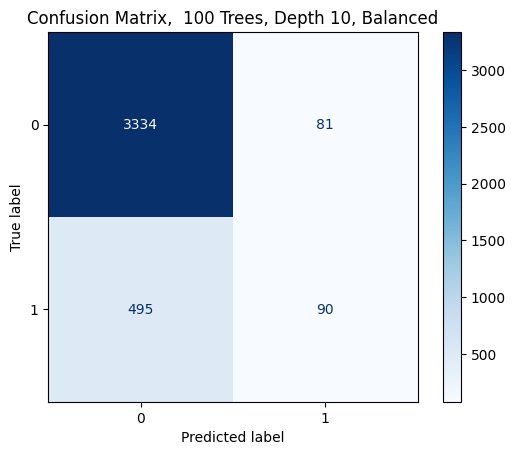

ROC AUC Score: 0.8344
Average Precision Score: 0.4438


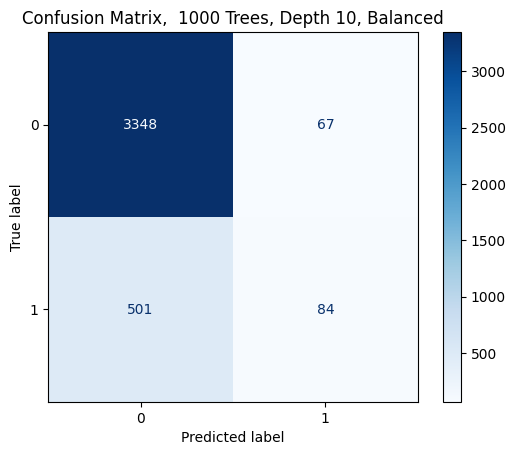

ROC AUC Score: 0.8390
Average Precision Score: 0.4569


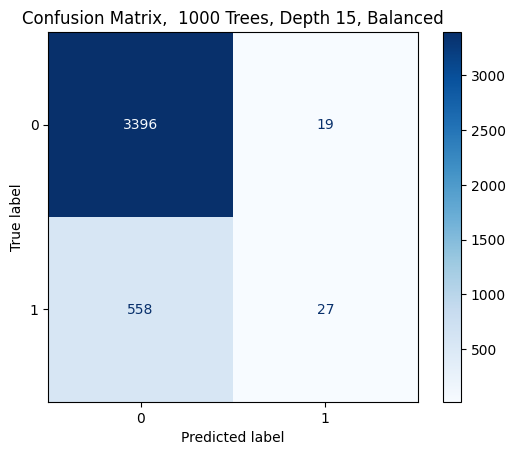

ROC AUC Score: 0.8384
Average Precision Score: 0.4473


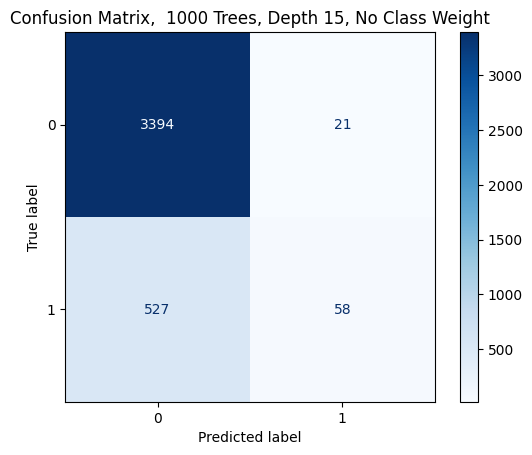

ROC AUC Score: 0.8183
Average Precision Score: 0.4936


(0.8183389020285068, 0.49361632292699675)

In [8]:

# --- Run a Few Models with Varying Parameters ---
feature_cols = [col for col in df_a.columns if col != 'RecordID_first']

# Model 1
rf1 = train_rf(df_a[feature_cols], outcomes_a['In-hospital_death'],
               n_estimators=100, max_depth=10, class_weight='balanced')
evaluate_model(rf1, df_c[feature_cols], outcomes_c['In-hospital_death'], title_info =' 100 Trees, Depth 10, Balanced')

# Model 2
rf2 = train_rf(df_a[feature_cols], outcomes_a['In-hospital_death'],
               n_estimators=1000, max_depth=10, class_weight='balanced')
evaluate_model(rf2, df_c[feature_cols], outcomes_c['In-hospital_death'], title_info =' 1000 Trees, Depth 10, Balanced')

# Model 3
rf3 = train_rf(df_a[feature_cols], outcomes_a['In-hospital_death'],
               n_estimators=1000, max_depth=15, class_weight='balanced')
evaluate_model(rf3, df_c[feature_cols], outcomes_c['In-hospital_death'], title_info =' 1000 Trees, Depth 15, Balanced')

# Model 4
rf4 = train_rf(df_a[feature_cols], outcomes_a['In-hospital_death'],
               n_estimators=1000, max_depth=15, class_weight=None)
evaluate_model(rf4, df_c[feature_cols], outcomes_c['In-hospital_death'], title_info =' 1000 Trees, Depth 15, No Class Weight')


In [9]:
# --- Randomized Hyperparameter Search ---
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 20),
    'max_samples': [0.5, 0.75, 1.0],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5), #limit complexity by limiting nb leaf in tree
    'class_weight': ['balanced', None],
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=30,  
    cv =3,
    verbose=1,
    n_jobs=-1
)

random_search.fit(df_a[feature_cols], outcomes_a['In-hospital_death'])

print("\nBest parameters from random search:")
print(random_search.best_estimator_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits

Best parameters from random search:
RandomForestClassifier(class_weight='balanced', max_depth=18, max_samples=1.0,
                       min_samples_leaf=4, min_samples_split=9,
                       n_estimators=712, random_state=42)


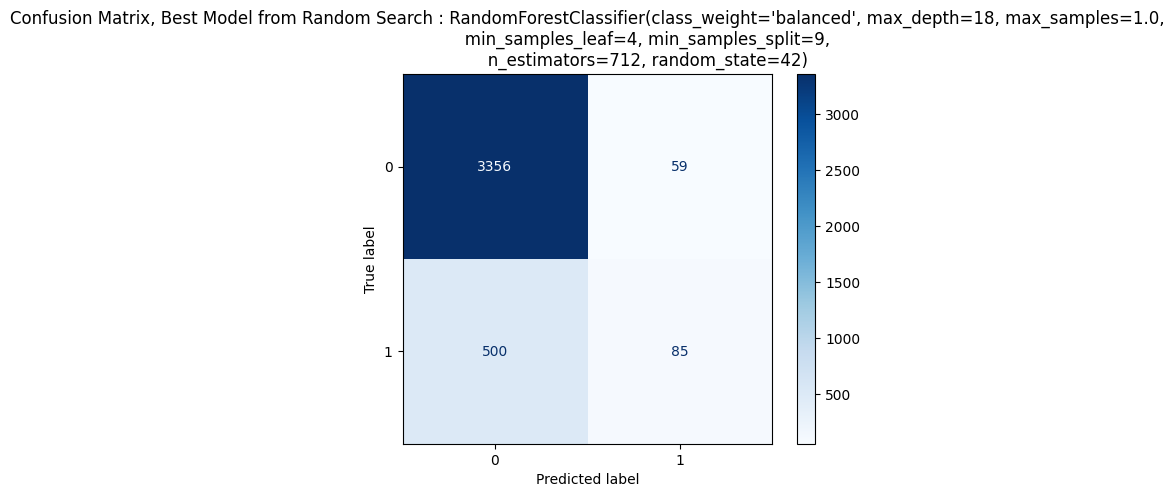

ROC AUC Score: 0.8431
Average Precision Score: 0.4789


(0.8431379910150043, 0.47894561728302)

In [10]:
# --- Evaluate Best Model ---
best_rf = random_search.best_estimator_
evaluate_model(best_rf, df_c[feature_cols], outcomes_c['In-hospital_death'], title_info=f'Best Model from Random Search : {random_search.best_estimator_}')

#### Compute feature importance

Feature ranking:
1. feature 114 (0.044213) GCS_mean
2. feature 44 (0.033253) Urine_mean
3. feature 116 (0.028190) GCS_max
4. feature 92 (0.025208) BUN_min
5. feature 89 (0.024895) BUN_mean
6. feature 45 (0.021962) Urine_std
7. feature 91 (0.021812) BUN_max
8. feature 46 (0.014876) Urine_max
9. feature 184 (0.014347) RecordID_first
10. feature 115 (0.013299) GCS_std
11. feature 109 (0.012686) PaCO2_mean
12. feature 118 (0.012000) GCS_skew
13. feature 154 (0.010966) Temp_mean
14. feature 15 (0.010739) HCO3_mean
15. feature 54 (0.010265) Creatinine_mean
16. feature 57 (0.010207) Creatinine_min
17. feature 69 (0.009411) Glucose_mean
18. feature 137 (0.008481) Lactate_min
19. feature 56 (0.008015) Creatinine_max
20. feature 71 (0.007963) Glucose_max
21. feature 121 (0.007923) HR_max
22. feature 18 (0.007912) HCO3_min
23. feature 181 (0.007322) Weight_VAR_max
24. feature 179 (0.007255) Weight_VAR_mean
25. feature 182 (0.007111) Weight_VAR_min
26. feature 129 (0.007080) PaO2_mean
27. feature 

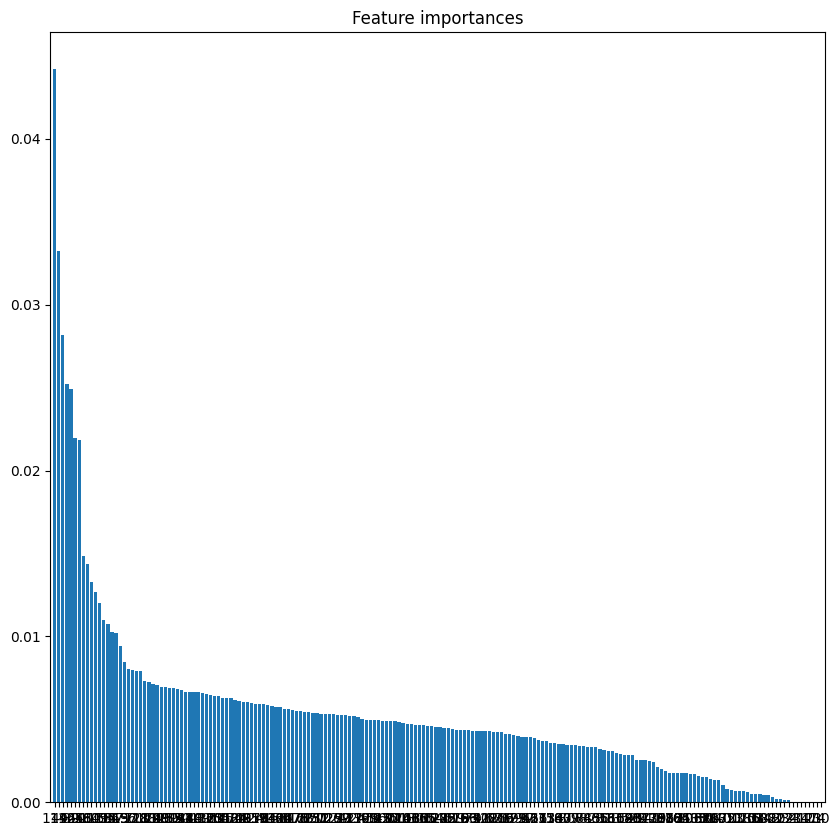

In [23]:
#  compute feature importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(len(feature_cols)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]), df_a.columns[indices[f]])
# Plot the feature importances of the forest
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.bar(range(len(feature_cols)), importances[indices], align="center")
plt.xticks(range(len(feature_cols)), indices)
plt.xlim([-1, len(feature_cols)])
plt.show()

## Logistic  regression - Standard Scaler

In [24]:
# --- scaling Data ---
feature_cols = [col for col in df_a.columns if col != 'RecordID_first']

scaler = StandardScaler()
scaler.fit(df_a[feature_cols])

df_a_scaled = pd.DataFrame(scaler.transform(df_a[feature_cols]), columns=feature_cols)
df_b_scaled = pd.DataFrame(scaler.transform(df_b[feature_cols]), columns=feature_cols)
df_c_scaled = pd.DataFrame(scaler.transform(df_c[feature_cols]), columns=feature_cols)


In [25]:
np.logspace(-3,3, 7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [26]:

# --- Grid Search for Best Regularization ---
# C = inverse of regularization strength, smaller values => stronger regularization

param_grid = {'C': np.logspace(-3, 3, 7)}
grid = GridSearchCV(LogisticRegression(max_iter=600, class_weight='balanced'),
                    param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(df_a_scaled, outcomes_a['In-hospital_death'])

best_log_reg = grid.best_estimator_
print("Best C:", grid.best_params_['C'])



Best C: 0.001


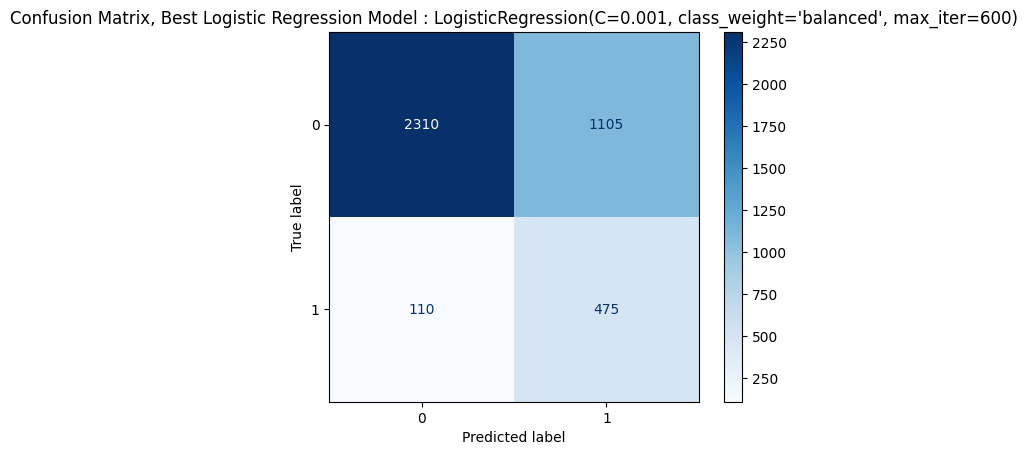

ROC AUC Score: 0.8208
Average Precision Score: 0.4407


(0.8207651011750573, 0.44065365481669677)

In [27]:
# --- Prediction on Test Set ---
evaluate_model(best_log_reg, df_c_scaled, outcomes_c['In-hospital_death'], title_info=f'Best Logistic Regression Model : {grid.best_estimator_}')

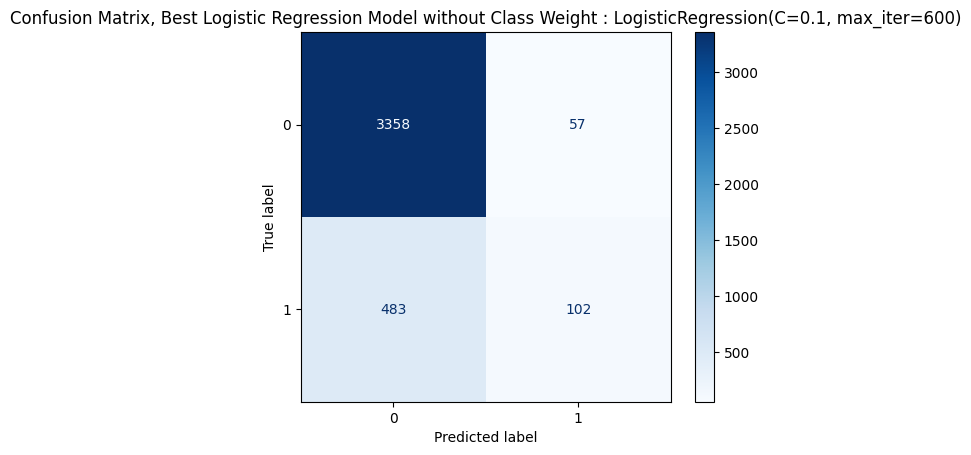

ROC AUC Score: 0.8331
Average Precision Score: 0.4669


(0.8331123374754414, 0.4668912758594793)

In [30]:
# model = best log reg but with no class weight
best_log_reg_no_weight = LogisticRegression(max_iter=600, C=grid.best_params_['C'])
best_log_reg_no_weight.fit(df_a_scaled, outcomes_a['In-hospital_death'])

evaluate_model(best_log_reg_no_weight, df_c_scaled, outcomes_c['In-hospital_death'], title_info=f'Best Logistic Regression Model without Class Weight : {best_log_reg_no_weight}')

## Logistic  regression - MinMax scaler


Best C: 0.1


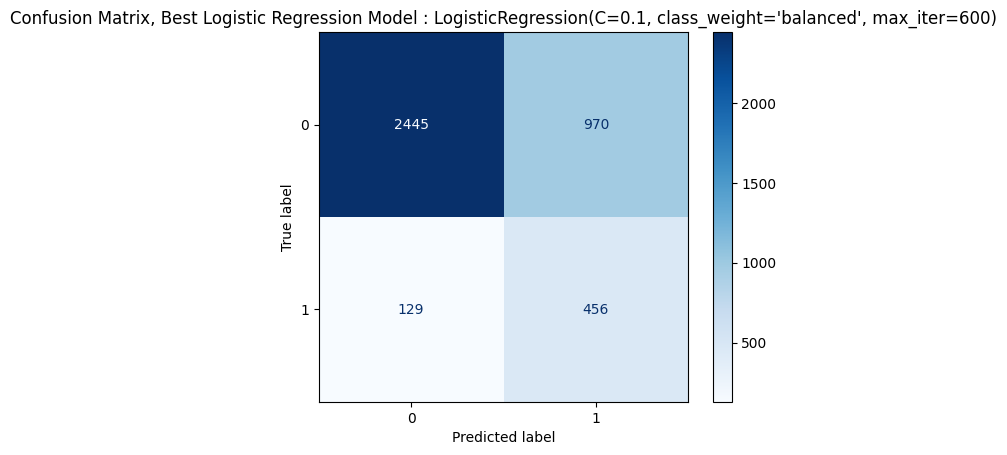

ROC AUC Score: 0.8287
Average Precision Score: 0.4606


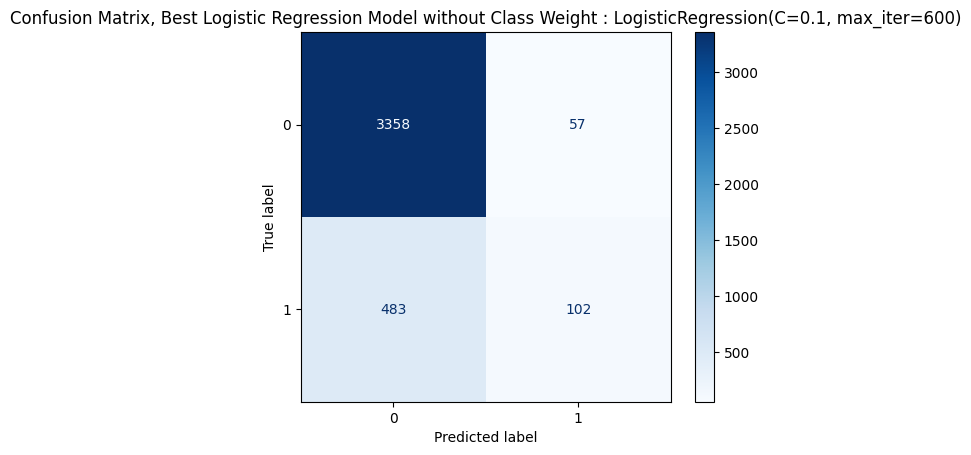

ROC AUC Score: 0.8331
Average Precision Score: 0.4669


(0.8331123374754414, 0.4668912758594793)

In [32]:

# --- scaling Data ---
feature_cols = [col for col in df_a.columns if col != 'RecordID_first']

scaler = MinMaxScaler()
scaler.fit(df_a[feature_cols])

df_a_scaled = pd.DataFrame(scaler.transform(df_a[feature_cols]), columns=feature_cols)
df_b_scaled = pd.DataFrame(scaler.transform(df_b[feature_cols]), columns=feature_cols)
df_c_scaled = pd.DataFrame(scaler.transform(df_c[feature_cols]), columns=feature_cols)

np.logspace(-3,3, 7)

# --- Grid Search for Best Regularization ---
# C = inverse of regularization strength, smaller values => stronger regularization

param_grid = {'C': np.logspace(-3, 3, 7)}
grid = GridSearchCV(LogisticRegression(max_iter=600, class_weight='balanced'),
                    param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(df_a_scaled, outcomes_a['In-hospital_death'])

best_log_reg = grid.best_estimator_
print("Best C:", grid.best_params_['C'])


# --- Prediction on Test Set ---
evaluate_model(best_log_reg, df_c_scaled, outcomes_c['In-hospital_death'], title_info=f'Best Logistic Regression Model : {grid.best_estimator_}')
# model = best log reg but with no class weight
best_log_reg_no_weight = LogisticRegression(max_iter=600, C=grid.best_params_['C'])
best_log_reg_no_weight.fit(df_a_scaled, outcomes_a['In-hospital_death'])

evaluate_model(best_log_reg_no_weight, df_c_scaled, outcomes_c['In-hospital_death'], title_info=f'Best Logistic Regression Model without Class Weight : {best_log_reg_no_weight}')
